In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.preprocessing import MinMaxScaler

In [6]:
df = pd.read_excel('D:\GitHub\MSc-Project\SWaT Data\SWaT.A1 _ A2_Dec 2015\Physical\SWaT_Dataset_Normal_v1.xlsx',
                   engine='openpyxl')

C:\Users\laure\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [7]:
df.columns


Index([' Timestamp', 'FIT101', 'LIT101', 'MV101', 'P101', 'P102', 'AIT201',
       'AIT202', 'AIT203', 'FIT201', 'MV201', 'P201', 'P202', 'P203', 'P204',
       'P205', 'P206', 'DPIT301', 'FIT301', 'LIT301', 'MV301', 'MV302',
       'MV303', 'MV304', 'P301', 'P302', 'AIT401', 'AIT402', 'FIT401',
       'LIT401', 'P401', 'P402', 'P403', 'P404', 'UV401', 'AIT501', 'AIT502',
       'AIT503', 'AIT504', 'FIT501', 'FIT502', 'FIT503', 'FIT504', 'P501',
       'P502', 'PIT501', 'PIT502', 'PIT503', 'FIT601', 'P601', 'P602', 'P603',
       'Normal/Attack'],
      dtype='object')

In [11]:

# 1. Separate the timestamp and data
time_column = df[' Timestamp']

data_columns = df.drop([' Timestamp','Normal/Attack'], axis=1)  # Drop the time column to scale the rest

# 2. Scale the data
scaler = MinMaxScaler()  # Initialize the scaler
data_columns_scaled = scaler.fit_transform(data_columns)  # Fit and transform the data

# 3. Recombine the data with the timestamp
df_scaled = pd.DataFrame(data_columns_scaled, columns=data_columns.columns)
df_scaled['Timestamp'] = time_column  # Add the time column back

# If you want 'time' to be the first column
df_scaled = df_scaled[['Timestamp'] + [col for col in df_scaled.columns if col != 'Timestamp']]

# Now df_scaled has the scaled data along with the original time column


In [16]:
df_scaled.columns

Index(['Timestamp', 'FIT101', 'LIT101', 'MV101', 'P101', 'P102', 'AIT201',
       'AIT202', 'AIT203', 'FIT201', 'MV201', 'P201', 'P202', 'P203', 'P204',
       'P205', 'P206', 'DPIT301', 'FIT301', 'LIT301', 'MV301', 'MV302',
       'MV303', 'MV304', 'P301', 'P302', 'AIT401', 'AIT402', 'FIT401',
       'LIT401', 'P401', 'P402', 'P403', 'P404', 'UV401', 'AIT501', 'AIT502',
       'AIT503', 'AIT504', 'FIT501', 'FIT502', 'FIT503', 'FIT504', 'P501',
       'P502', 'PIT501', 'PIT502', 'PIT503', 'FIT601', 'P601', 'P602', 'P603'],
      dtype='object')

In [14]:
df_scaled.head()

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,FIT504,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603
0,22/12/2015 4:30:00 PM,0.0,0.005294,0.5,0.0,0.0,0.012291,0.075099,0.002009,0.0,...,0.0,0.0,0.0,0.000814,0.0,0.001217,0.000147,0.0,0.0,0.0
1,22/12/2015 4:30:01 PM,0.0,0.005407,0.5,0.0,0.0,0.012291,0.075099,0.002009,0.0,...,0.0,0.0,0.0,0.000814,0.0,0.001217,0.000147,0.0,0.0,0.0
2,22/12/2015 4:30:02 PM,0.0,0.005520,0.5,0.0,0.0,0.012291,0.075099,0.002009,0.0,...,0.0,0.0,0.0,0.000814,0.0,0.001217,0.000147,0.0,0.0,0.0
3,22/12/2015 4:30:03 PM,0.0,0.005801,0.5,0.0,0.0,0.012291,0.075099,0.002009,0.0,...,0.0,0.0,0.0,0.000814,0.0,0.001217,0.000147,0.0,0.0,0.0
4,22/12/2015 4:30:04 PM,0.0,0.005576,0.5,0.0,0.0,0.012291,0.075099,0.002009,0.0,...,0.0,0.0,0.0,0.000814,0.0,0.001217,0.000147,0.0,0.0,0.0


In [ ]:
df_scaled['Timestamp']

In [20]:
df_scaled['Timestamp'] = pd.to_datetime(df_scaled['Timestamp'])


In [22]:
filename = 'D:\GitHub\MSc-Project\SWaT DataSWaT Scaled.csv'

df_scaled.to_csv(filename, index = False)

In [41]:
def extract_days_data(df, date):
    '''
    :param df: oringinal swat dataset including timestamp column
    :param date: date to extract, single day string in format yyyy-mm-dd
    :return: extracted data as new df
    '''

    df_extracted = df[df['Timestamp'].dt.date == pd.to_datetime(date).date()]

    # convert slice from scaled to standalone df
    df_extracted = df_extracted.copy()

    # Extract components
    df_extracted['date'] = df_extracted['Timestamp'].dt.date        # Extracts date
    df_extracted['time'] = df_extracted['Timestamp'].dt.time        # Extracts time

    return df_extracted

In [42]:
df_23rd = extract_days_data(df_scaled, '2015-12-23')

In [44]:
df_23rd.head()

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,date,time
27000,2015-12-23 00:00:00,0.0,0.994030,0.5,1.0,0.0,0.509983,0.197627,0.500754,0.769136,...,0.0,0.958717,0.279476,0.962447,0.0,0.0,0.0,0.0,2015-12-23,00:00:00
27001,2015-12-23 00:00:01,0.0,0.993523,0.5,1.0,0.0,0.509983,0.197627,0.501658,0.863706,...,0.0,0.958466,0.279476,0.962447,0.0,0.0,0.0,0.0,2015-12-23,00:00:01
27002,2015-12-23 00:00:02,0.0,0.993523,0.5,1.0,0.0,0.509983,0.197627,0.503767,0.916761,...,0.0,0.957840,0.279476,0.962366,0.0,0.0,0.0,0.0,2015-12-23,00:00:02
27003,2015-12-23 00:00:03,0.0,0.993467,0.5,1.0,0.0,0.494624,0.194993,0.506178,0.952045,...,0.0,0.957840,0.279476,0.961636,0.0,0.0,0.0,0.0,2015-12-23,00:00:03
27004,2015-12-23 00:00:04,0.0,0.993072,0.5,1.0,0.0,0.494624,0.194993,0.509593,0.974452,...,0.0,0.958654,0.279476,0.961636,0.0,0.0,0.0,0.0,2015-12-23,00:00:04


In [45]:
filename = 'D:\GitHub\MSc-Project\SWaT DataSWaT 2015-12-23.csv'

df_23rd.to_csv(filename, index = False)

Get freq components and relative power for a data set. Use this to compare pattern of activity to other variables. Phase difference should show which is dependant variable (i.e. lag in signal).

In [46]:
def doFourierAnalysis(df, column_name):
    # Extract the data from the DataFrame
    data = df[column_name].values

    # Number of data points
    N = len(data)

    # Compute the Fast Fourier Transform (FFT)
    fft_data = np.fft.fft(data)

    # Compute the Power Spectrum (magnitude of the FFT squared)
    power_spectrum = np.abs(fft_data) ** 2

    # Compute the frequency bins
    # If you have a time step dt between data points, replace 1.0 with dt in the line below
    freq = np.fft.fftfreq(N, 10.0)

    # Plotting the Power Spectrum
    plt.figure(figsize=(10, 6))
    plt.plot(freq, power_spectrum)
    plt.title(f'{column_name} Power Spectrum')
    plt.xscale('log')
    plt.xlabel('Frequency')
    plt.yscale('log')
    plt.ylabel('Power')
    plt.xlim(0, np.max(freq))  # Limit x-axis to non-negative frequencies
    plt.show()



In [204]:

def performFourierAndLimitHarmonics(df, column_name, num_harmonics):

    data = df[column_name].values

    # Perform the Fast Fourier Transform (FFT)
    fft_data = np.fft.fft(data)
    N = len(data)

    # Compute the magnitude of the FFT and find the indices of the largest components
    magnitudes = np.abs(fft_data)
    indices = np.argsort(magnitudes)[::-1]  # Sort indices by magnitude in descending order

    # Zero out all but the largest `num_harmonics` components
    fft_data_limited = np.zeros(N, dtype=complex)
    for i in range(num_harmonics):
        index = indices[i]
        fft_data_limited[index] = fft_data[index]

    # Inverse FFT to reconstruct the signal with limited harmonics
    reconstructed_signal = np.fft.ifft(fft_data_limited)

    return reconstructed_signal, fft_data_limited




C:\Users\laure\AppData\Local\Temp\ipykernel_18344\3981965998.py:26: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0, np.max(freq))  # Limit x-axis to non-negative frequencies


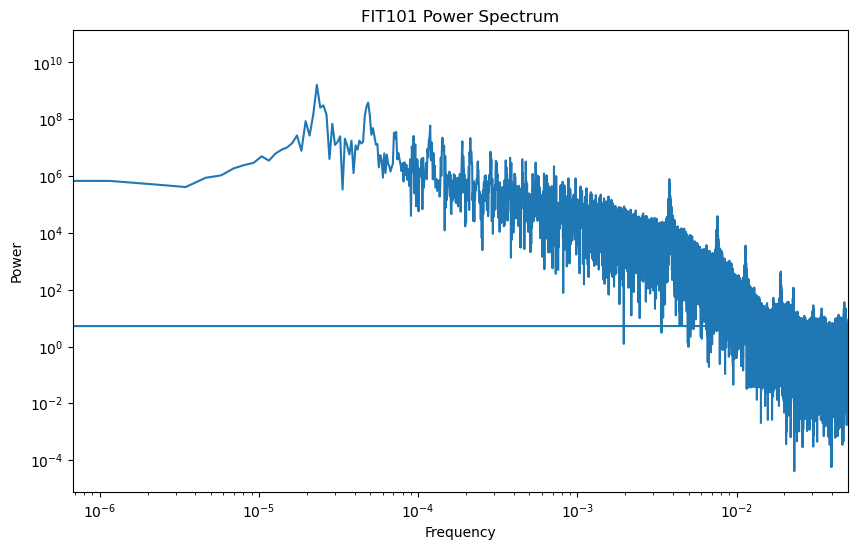

In [164]:
doFourierAnalysis(df_23rd, 'FIT101')

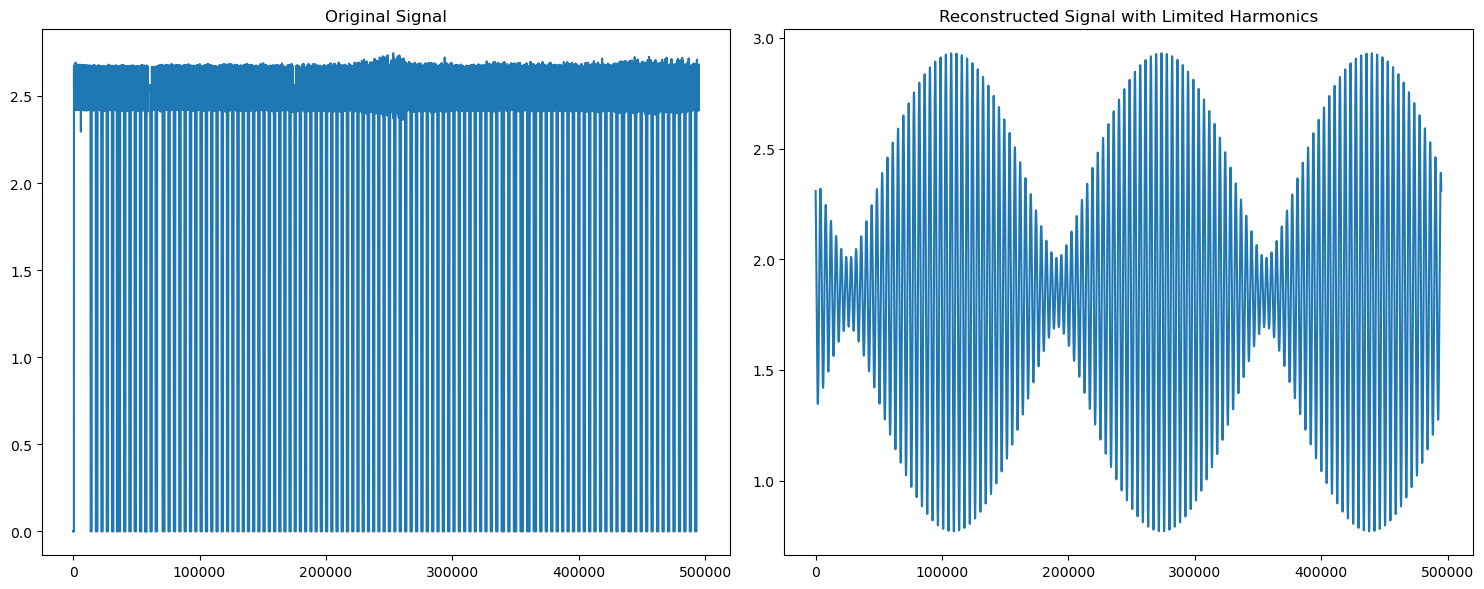

In [212]:
#performFourierAndLimitHarmonics(df_23rd, 'FIT101', 10)
df = df
column_name= 'FIT101'
# Example usage:
# signal is your input signal, num_harmonics is the number of harmonics you want to keep
reconstructed_signal, limited_fft_data = performFourierAndLimitHarmonics(df, column_name, num_harmonics=5)
data = df[column_name].values
# Plot original and reconstructed signals
plt.figure(figsize=(15, 6))

# Original Signal
plt.subplot(1, 2, 1)
plt.plot(data)
plt.title('Original Signal')

# Reconstructed Signal with Limited Harmonics
plt.subplot(1, 2, 2)
plt.plot(reconstructed_signal.real)  # Take the real part since the output is complex
plt.title('Reconstructed Signal with Limited Harmonics')

plt.tight_layout()
plt.show()

In [184]:

def plot_columns(df, columns_list):

    # Convert the 'time' column to datetime if it's not already in that format
    if df['time'].dtype == object:
        df['time'] = pd.to_datetime(df['Timestamp'])

    # Set the size of the plot
    plt.figure(figsize=(12, 6))

    # Loop through the columns and plot each one
    for column in columns_list:
        plt.plot(df['time'], df[column], label=column)

    # Add title and labels
    plt.title('Signals Over Time')
    plt.xlabel('Time')
    plt.yscale('log')
    plt.ylabel('Signal Value')

    # Show legend
    plt.legend()

    # Show grid
    plt.grid(True)

    # Adjust layout
    plt.tight_layout()

    # Show plot
    plt.show()


In [185]:
columns_list = ['MV101','LIT101','FIT101','P101','FIT201','MV201']

C:\Users\laure\AppData\Local\Temp\ipykernel_18344\3854920592.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time'] = pd.to_datetime(df['Timestamp'])


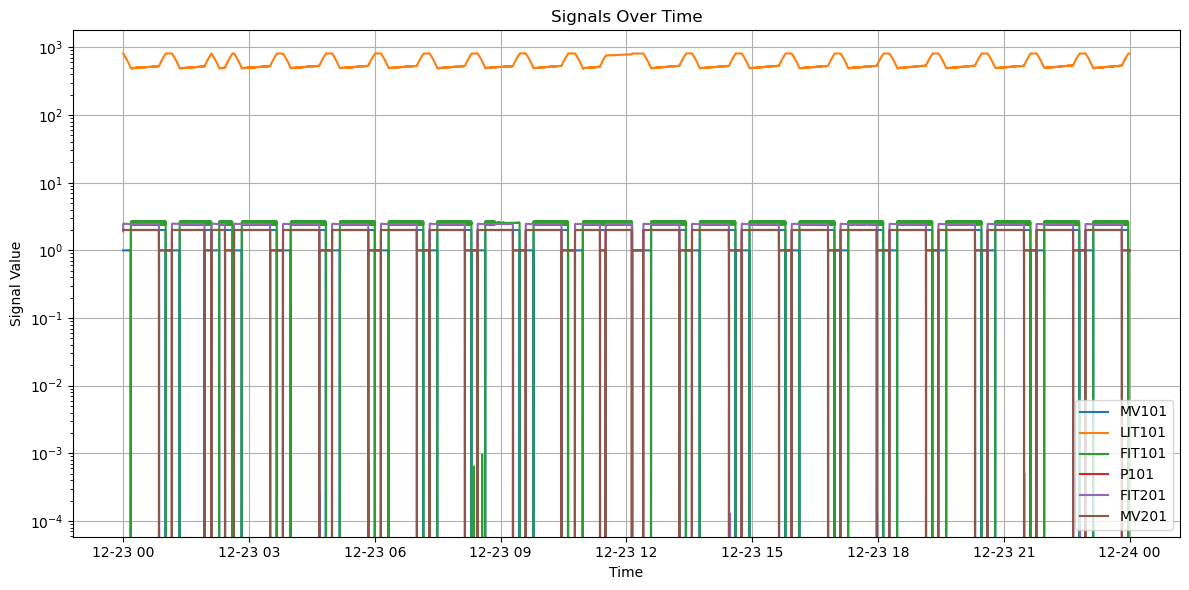

In [186]:
plot_columns(df_23rd, columns_list)

In [188]:
# Function to convert time to seconds since midnight
def time_to_seconds(t):
    return t.hour * 3600 + t.minute * 60 + t.second


In [192]:
# Convert 'time' from datetime.time to seconds since midnight for the comparison
df_23rd['time_in_seconds'] = df_23rd['time'].apply(time_to_seconds)

# Now filter the DataFrame
df_23rd_1hr = df_23rd.loc[df_23rd['time_in_seconds'] >= time_to_seconds(dt.time(1, 0, 0))]

C:\Users\laure\AppData\Local\Temp\ipykernel_18344\4116162045.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_23rd['time_in_seconds'] = df_23rd['time'].apply(time_to_seconds)


In [196]:
# Now filter the DataFrame
df_23rd_1min = df_23rd.loc[df_23rd['time_in_seconds'] >= time_to_seconds(dt.time(0, 1, 0))]

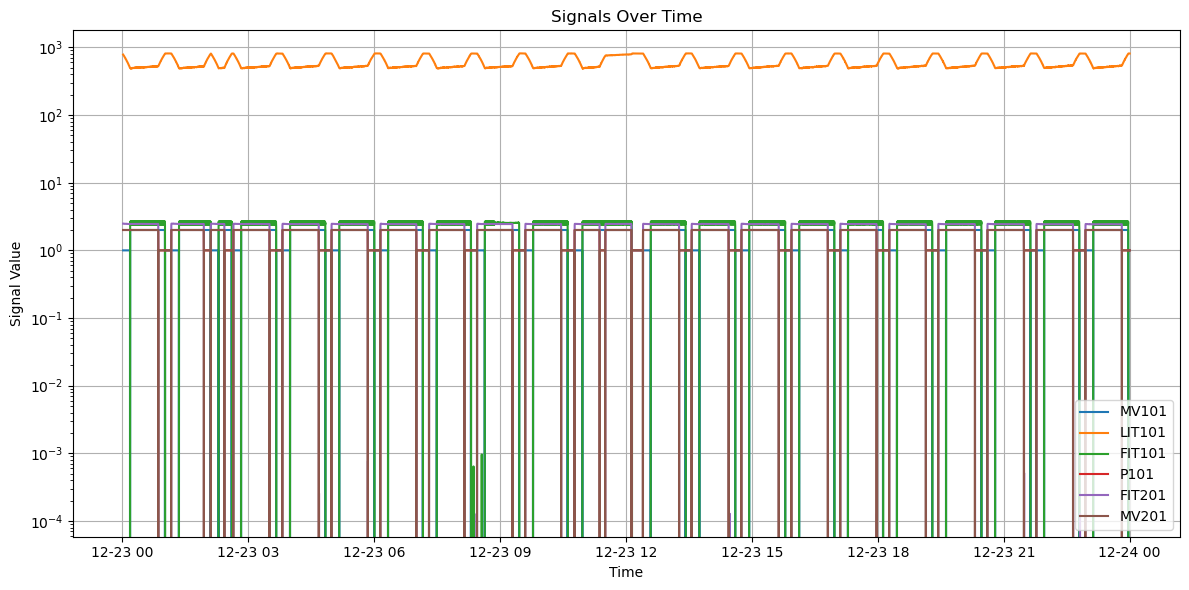

In [197]:
plot_columns(df_23rd_1min, columns_list)

C:\Users\laure\AppData\Local\Temp\ipykernel_18344\3981965998.py:26: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0, np.max(freq))  # Limit x-axis to non-negative frequencies


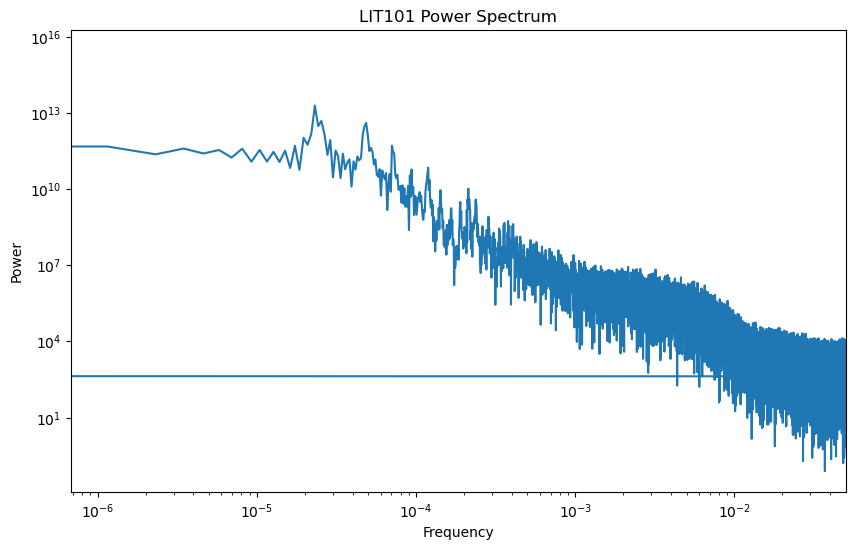

In [169]:
doFourierAnalysis(df_23rd, 'LIT101')

C:\Users\laure\AppData\Local\Temp\ipykernel_18344\3981965998.py:26: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0, np.max(freq))  # Limit x-axis to non-negative frequencies


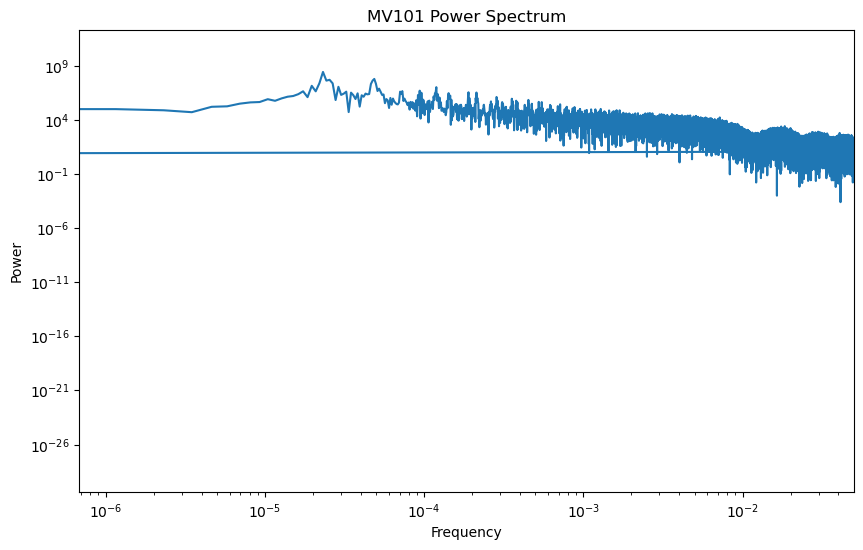

In [170]:
doFourierAnalysis(df_23rd, 'MV101')

In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plotSignalAndFFTfromDF(df, time_col, signal_col):
    # Ensure the time column is in datetime format or numerical
    if not np.issubdtype(df[time_col].dtype, np.number):
        # Convert time strings to datetime
        df[time_col] = pd.to_datetime(df[time_col])

        # Convert datetime to time in seconds (or another consistent unit)
        df['time_seconds'] = (df[time_col] - df[time_col].iloc[0]).dt.total_seconds()
        time = df['time_seconds'].values
    else:
        # Time data is already numerical
        time = df[time_col].values

    # Extract signal data from the DataFrame
    signal = df[signal_col].values

    # Perform the Fast Fourier Transform (FFT)
    fft_data = np.fft.fft(signal)
    N = len(signal)

    # Compute the frequency bins
    T = (time[1] - time[0])  # sample spacing, assuming uniform spacing
    freq = np.fft.fftfreq(N, T)

    # Compute the Power Spectrum (magnitude of the FFT squared)
    power_spectrum = np.abs(fft_data)**2

    # Set up a subplot grid that has height 2 and width 1,
    # and set the first such subplot as active.
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)

    # First Subplot: Original Signal in Time Domain
    plt.plot(time, signal)
    plt.title(f'Original Signal (Time Domain) - {signal_col}')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')

    # Second Subplot: FFT of the Signal in Frequency Domain
    plt.subplot(2, 1, 2)
    plt.stem(freq[:N // 2], power_spectrum[:N // 2], 'b', markerfmt=" ", basefmt="-b")  # Plot only positive frequencies
    plt.title(f'Fourier Transform (Frequency Domain) - {signal_col}')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power')
    plt.xlim(0, max(freq))

    # Adjust layout to prevent overlapping
    plt.tight_layout()
    plt.show()

# Example usage:
# plotSignalAndFFTfromDF(df_23rd, 'time', 'MV101')



In [172]:
# Example usage:
plotSignalAndFFTfromDF(df_23rd, 'time', 'MV101')

TypeError: <class 'datetime.time'> is not convertible to datetime